### Mogi's deformation model
The vertical change in elevation produced by change in excess pressure within a spherical magma  in cylindrical coordinates (displacement as a function of radial distance from the center of the sphere) is given by: 

$$ w= \frac{\Delta P (1-v)}{G} \frac{a^3 d}{(x^2+d^2)^\frac{3}{2}} $$

where $w$ is the vertical $(z)$ component of surface displacement (m) at point $S = (x,0,0)$. Notice the right-hand side of this equation is shown in two parts. The first fraction has $\Delta P$ in the numerator, that is the excess pressure or, if negative, the decrease in pressure inside the Earth following the eruption. The fraction also has two variables, $v$ and $G$, which are defined below.

<div>
    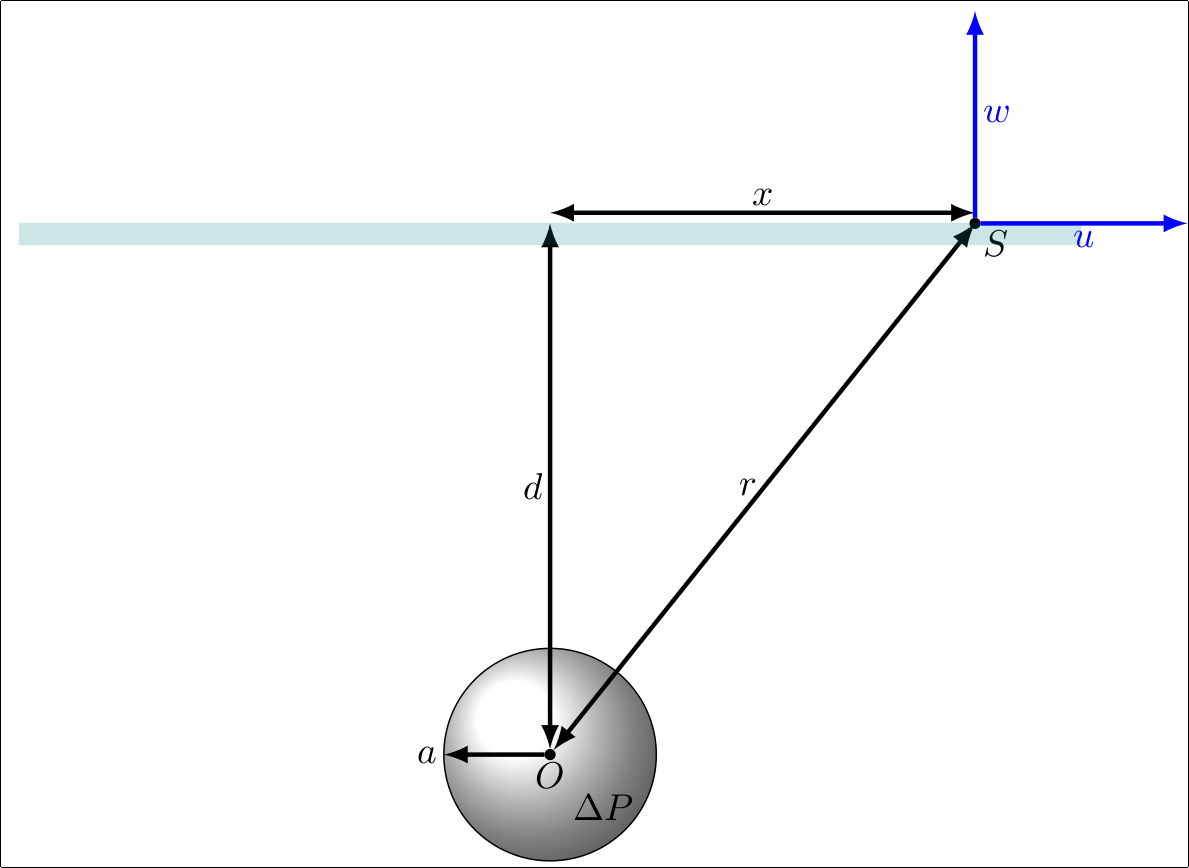
</div>
Consider the second fraction on the right-hand side of the equation. In the numerator, $d$ is the depth (m) to the center of the spherical pressure source, and $a$ is its radius (m). The numerator has the dimension of length raised to the fourth power (m$^4$). The denominator is the cube of the radial distance of the observation point, $S$, from the center of the sphere, so the unit of this entire fraction is also length (m). This is the unit of the displacement that we want to explain, $w$. Since the units of displacement are accounted for, it follows that the first fraction:

$$ \frac{\Delta P (1-v)}{G} $$

is a dimensionless ratio.

In this case, $\Delta P$ is the applied pressure change (MPa) because of the magma. The SI units of pressure are Pascal (Pa), and since there is a big pressure change in this problem, mega-Pascal is used (MPa). The variable $G$ is called the shear modulus, but can be thought of as the Earth's rigidity or strength, and has the same units (MPa). If the Earth is particularly strong and rigid, $G$ is large and the ratio shows that there will be less surface displacement for a given excess pressure. If $G$ is relatively small, the Earth is relatively weak and easily bent, then the displacement will be relatively large for a given excess pressure. The remaining variable in this fraction is $v$, which is called Poisson's ratio. This variable attempts to account for the compressibility of the  Earth and varies between 0 and 1. If the Earth is highly compressible, Poisson's ratio is large. This means the rocks will squeeze together, changing volume in response to the excess pressure. For highly compressible rocks, $v$ is large so the displacement observed at the surface will be less for a given excess pressure. If the rocks are not particularly compressible they retain their original shape when the pressure is applied. In this case, with small Poisson's ratio, the excess pressure will create more displacement at the surface.

### Reference
Mogi, K., 1958. Relations between the eruptions of various volcanoes and the deformations of the ground surfaces around them. Earthq Res Inst, 36, pp.99-134.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm


In [6]:

def mogi_vertical(x,a,d,g,delta_p,sigma):
    # Calculate the vertical displacement (m)
    # at the surface due to a subsurface
    # pressure source using Mogi's solution
    # x is horizontal distance (m), radial from source
    # a is source radius (m) must be << d
    # d is depth (m)
    # g is shear modulus (MPa), typically 3e5 or less
    # delta_p is the excess pressure of the source (MPa)
    # sigma is Poisson's ratio (typically 0.25)
    w = (1-sigma)*delta_p/g * a**3*d/((x**2+d**2)**1.5)
    return w*1000  # mm displacement

def mogi_vertical_simple(x,a,d):
    # Vertical displacement without scaling
    # Calculate the shape of the vertical displacement
    # at the surface due to a subsurface
    # pressure source using Mogi's solution
    # x is horizontal distance (m), radial from source
    # a is source radius (m) must be << d
    # d is depth (m)
    # 
    w = a**3*d/((x**2+d**2)**1.5)
    return w*1000  # mm displacement if multiplied by gamma,  scale this answer by gamma = (1-sigma)*delta_p/G

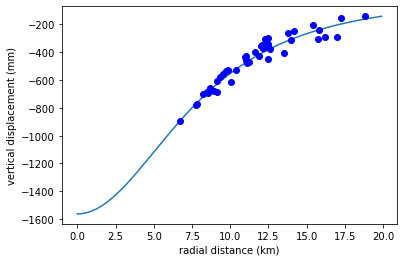

In [7]:
a = 2500.0 #source radius (m)
d = 10000.0 #source depth (m),  d > a
sigma = 0.25 #Poisson ratio, 0 < sigma < 1
delta_p = -400.0 #excess pressure (MPa)
g = 30000.0 #rigidity of elastic half-space (MPa)

# Sakurajima displacements following 1914 eruption
# The data are taken from Mogi (1958)
# The data were collected by line levelling by
# F. Omori and colleagues
# displacement is the difference between 
# measured elevations in 1893 and 1914.
sakura = [(17.0,-291),(16.2,-291),(15.75,-302),(13.5,-407),(12.45,-446),(10.4,-527),(8.7,-658),(7.85,-770),
          (6.7,-894),(7.75,-776),(8.25,-703),(9.15,-608),(9.85,-526),(9.7,-536),(9.55,-560),(9.3,-577),(8.5,-684),
          (8.55,-690),(8.95,-681),(9.15,-685),(10.05,-616),(11.1,-481),(11.9,-427),(12.15,-369),(12.1,-348),
          (12.5,-301),(12.3,-306),(10.95,-433),(11.05,-426),(11.0,-453),(12.0,-356),(12.4,-344),(12.5,-363),
          (11.6,-401),(11.2,-468),(12.6,-379),(13.95,-314),(15.8,-242),(12.15,-369),(12.5,-338),(13.75,-260),
          (14.15,-244),(15.4,-206),(17.25,-155),(18.8,-143)]

# calculate vertical displacement for this
# range of radial distances (m)
x1 = np.arange(0,20000,100)

# plot vertical displacement calculated with
# Mogi solution in mm vs. km
plt.plot(x1/1000, mogi_vertical(x1,a,d,g,delta_p,sigma))

# Compare the Mogi solution to observations
# for Salurajima following deflation after
# the 1914 eruption
radial, vert_displace = zip(*sakura)

plt.plot(radial, vert_displace, "bo")
plt.xlabel("radial distance (km)")
plt.ylabel("vertical displacement (mm)")
#plt.title("Mogi solution for 1914 Sakurajima deflation")

plt.savefig("sakurajima.png")
plt.show()


### Now instead treat the problem as a linear regression

A linear regression model establishes the relation between a dependent variable ($y$) and at least one independent variable($x$) as : 

$\hat{y}=b_1x+b_0  $

In ordinary least spares regression (OLS), we have to choose the values of $b_1$  and $b_0$  such that, the total sum of squares of the difference between the calculated and observed values of y, is minimised. 

Formula for OLS:

$$ S=\sum\limits_{i=1}^n (y_i - \hat{y_i})^2 = \sum\limits_{i=1}^n (y_i - b_1x_1 - b_0)^2 = \sum\limits_{i=1}^n (\hat{\epsilon_i})^2 = min  $$
Where, 

$\hat{y_i} $ = predicted value for the $i^{th}$ observation 

$y_i  =$ actual value for the $i^{th}$ observation 

$\epsilon_i$  = error/residual for the $i^{th}$ observation 

$n =$ total number of observations
To get the values of $b_0$  and $b_1$  which minimise $S$, we can take a partial derivative for each coefficient and equate it to zero.

For the Mogi problem, $b_o$ = 0, $b_1$ is $\gamma$:

$$\hat{y}= \gamma \times \textrm{mogi_vertical_simple(x,a,d)}$$

In [8]:


# translate radial distance to SI units (meters)
radial_dist = np.array(radial)*1000

# find x, by calling the simple Mogi function
# passing the radial distance and parameters that are 
# treated as constants (a,d)
x = mogi_vertical_simple(radial_dist,a,d)

# the array of vertical displacements
# observed at radial distances
y = np.array(vert_displace)

# This is the model y = bx
ols_model = sm.OLS(y,x)

# This is the fit to the model
ols_results = ols_model.fit()

# there is only one parameter - b
print(ols_results.params)


#print out all the summary stats related ot the models fit
print(ols_results.summary())

[-0.0098164]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              5766.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):                    2.65e-48
Time:                        15:24:53   Log-Likelihood:                         -232.33
No. Observations:                  45   AIC:                                      466.7
Df Residuals:                      44   BIC:                                      468.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

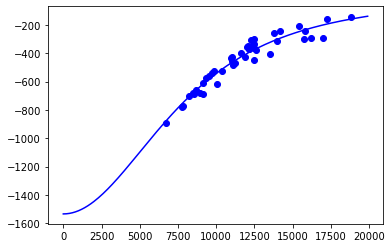

In [9]:

x1 = np.arange(0,20000,100)
y_hat = ols_results.params[0] * mogi_vertical_simple(x1,a,d)

# plot vertical displacement calculated with
# Mogi solution in mm vs. km

plt.plot(radial_dist, vert_displace, "bo")
plt.plot(x1, y_hat, "b-")
plt.show()